## Data Preperation

Combine data for training

In [ ]:
from readme_parser import rparser
rp = rparser()

Read csv

In [1]:
import pandas as pd

df = pd.read_csv('m14_merged.csv', index_col=0)

In [89]:
column_names = df.columns
print(column_names)

Index(['net_acc_mean', 'net_acc_std', 'net_acc_min', 'net_acc_max',
       'EDA_phasic_mean', 'EDA_phasic_std', 'EDA_phasic_min', 'EDA_phasic_max',
       'EDA_smna_mean', 'EDA_smna_std', 'EDA_smna_min', 'EDA_smna_max',
       'EDA_tonic_mean', 'EDA_tonic_std', 'EDA_tonic_min', 'EDA_tonic_max',
       'BVP_mean', 'BVP_std', 'BVP_min', 'BVP_max', 'TEMP_mean', 'TEMP_std',
       'TEMP_min', 'TEMP_max', 'ACC_x_mean', 'ACC_x_std', 'ACC_x_min',
       'ACC_x_max', 'ACC_y_mean', 'ACC_y_std', 'ACC_y_min', 'ACC_y_max',
       'ACC_z_mean', 'ACC_z_std', 'ACC_z_min', 'ACC_z_max', 'Resp_mean',
       'Resp_std', 'Resp_min', 'Resp_max', '0_mean', '0_std', '0_min', '0_max',
       'BVP_peak_freq', 'TEMP_slope', 'subject', 'label', 'age', 'height',
       'weight', 'gender_ female', 'gender_ male', 'coffee_today_YES',
       'sport_today_YES', 'smoker_NO', 'smoker_YES', 'feel_ill_today_YES',
       'patient_ID'],
      dtype='object')


In [11]:
df

,net_acc_mean,net_acc_std,net_acc_min,net_acc_max,EDA_phasic_mean,EDA_phasic_std,EDA_phasic_min,EDA_phasic_max,EDA_smna_mean,EDA_smna_std,...,age,height,weight,gender_ female,gender_ male,coffee_today_YES,sport_today_YES,smoker_NO,smoker_YES,feel_ill_today_YES
0,1.397968,0.141481,1.109299,1.678399,1.824289,1.088328,0.367977,4.319987,1.284376,1.952823,...,27,175,80,False,True,False,False,True,False,False
1,1.210132,0.091882,1.014138,1.485800,2.109146,1.223528,0.539150,4.459367,1.467865,2.852510,...,27,175,80,False,True,False,False,True,False,False
2,1.010977,0.102315,0.832216,1.190967,0.152828,0.128896,0.006950,0.544346,0.105091,0.244891,...,27,175,80,False,True,False,False,True,False,False
3,0.775187,0.046391,0.693996,0.876819,0.177595,0.126167,0.002789,0.361388,0.110786,0.199704,...,27,175,80,False,True,False,False,True,False,False
4,0.657494,0.034540,0.594667,0.718106,0.035014,0.039616,0.001144,0.132781,0.026716,0.114738,...,27,175,80,False,True,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
776,2.569649,0.076144,2.425131,2.672395,0.066713,0.072566,0.000928,0.240035,0.057264,0.185161,...,26,171,54,True,False,True,False,True,False,False
777,2.560615,0.017168,2.527118,2.613042,0.029320,0.033648,0.000164,0.110417,0.015862,0.072435,...,26,171,54,True,False,True,False,True,False,False
778,2.556600,0.020590,2.534175,2.639791,0.029336,0.021918,0.000273,0.080504,0.024992,0.082000,...,26,171,54,True,False,True,False,True,False,False
779,2.559555,0.020610,2.520352,2.581365,0.018758,0.013372,0.001268,0.050152,0.014543,0.042816,...,26,171,54,True,False,True,False,True,False,False


## Feature Extraction

Heat map for all attributes

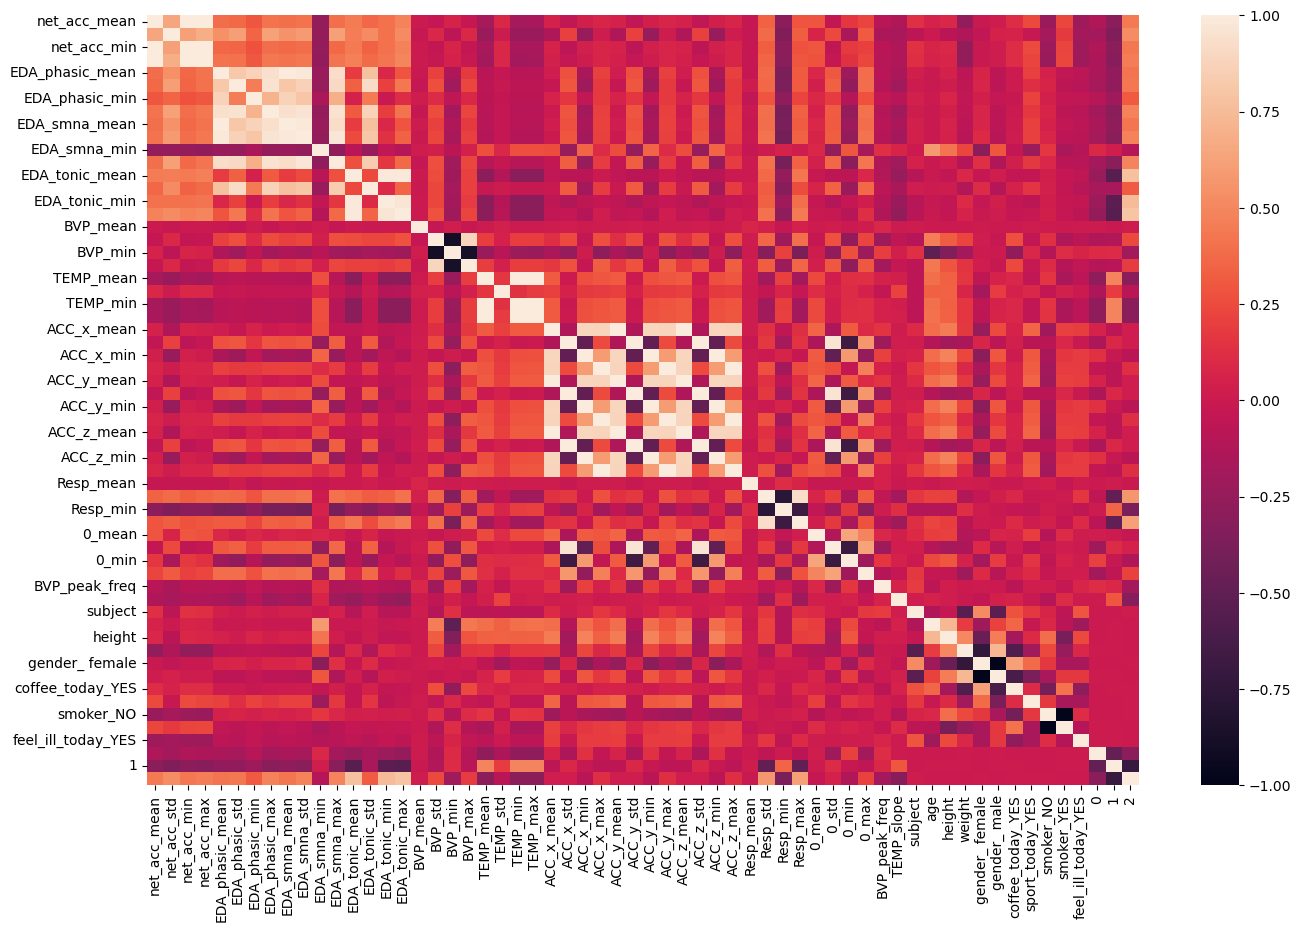

In [8]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

cdf = pd.concat([df.drop('label', axis=1), pd.get_dummies(df['label'])], axis=1)
corr = cdf.corr()
plt.figure(figsize=(16,10))
sns.heatmap(corr);

Correlation-based Feature Selection

In [36]:
import pandas as pd

# Calculate correlation matrix
correlation_matrix = cdf.corr()

# Set correlation threshold
correlation_threshold = 0.5

highly_correlated_pairs = (correlation_matrix.abs() > correlation_threshold) & (correlation_matrix != 1)
highly_correlated_attrs = set()
for i in range(len(highly_correlated_pairs.columns)):
    for j in range(i):
        if highly_correlated_pairs.iloc[i, j]:
            colname = highly_correlated_pairs.columns[i]
            highly_correlated_attrs.add(colname)

# Drop highly correlated features from DataFrame
df_filtered = df.drop(columns=highly_correlated_attrs, errors='ignore')

print(df_filtered.columns)


Index(['net_acc_mean', 'EDA_smna_min', 'EDA_tonic_mean', 'BVP_mean', 'BVP_std',
       'TEMP_mean', 'TEMP_std', 'ACC_x_mean', 'ACC_x_std', 'Resp_mean',
       'Resp_std', '0_mean', 'BVP_peak_freq', 'TEMP_slope', 'subject', 'label',
       'sport_today_YES', 'smoker_NO', 'feel_ill_today_YES', 'patient_ID'],
      dtype='object')


In [44]:
feats = list(df_filtered.columns)

## Decision Tree

Subject 2: Accuracy = 1.0
Subject 3: Accuracy = 0.875
Subject 4: Accuracy = 0.9375
Subject 5: Accuracy = 1.0
Subject 6: Accuracy = 1.0
Subject 7: Accuracy = 0.9375
Subject 8: Accuracy = 0.9375
Subject 9: Accuracy = 1.0
Subject 10: Accuracy = 0.8823529411764706
Subject 11: Accuracy = 1.0


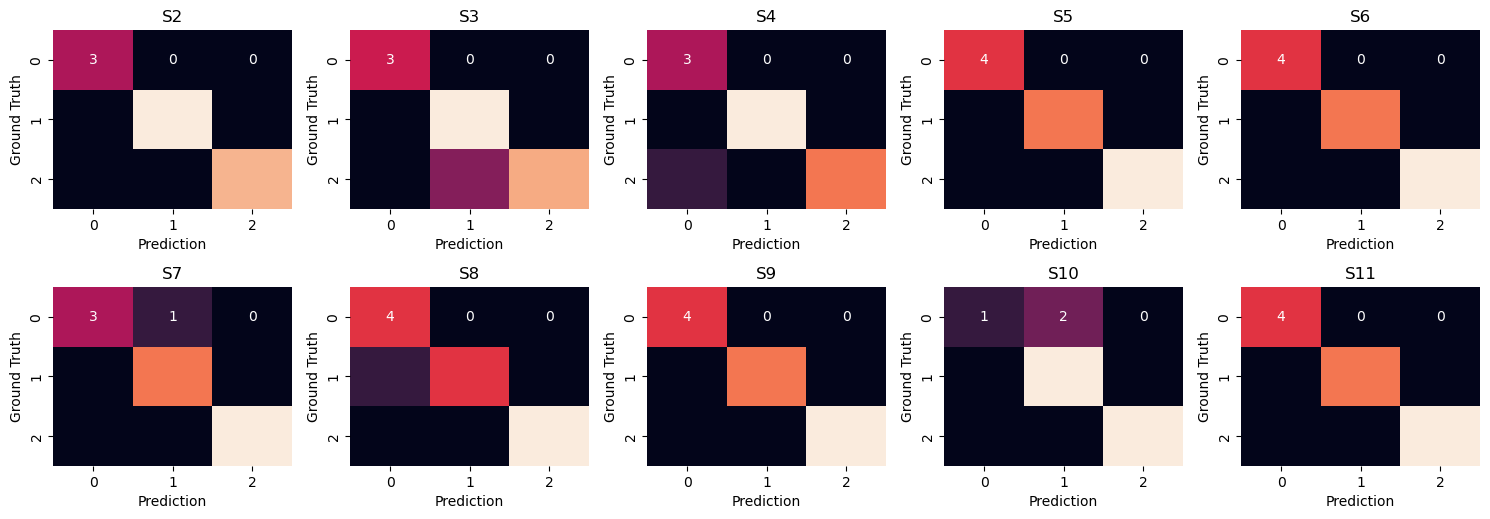

In [86]:
from sklearn.feature_selection import SelectFromModel
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
df2 = df[feats]

# One-hot encode the labels
df2 = pd.concat([df2.drop('label', axis=1), pd.get_dummies(df2['label'])], axis=1)

# Get the list of all subjects
subject_list = df2['subject'].unique()

confusion_matrices = {}

# create decision tree
classifier = DecisionTreeClassifier(random_state=42)

predicted_labels_DT = {}

for subject_id in subject_list:
    subject_data = df2[df2['subject'] == subject_id]
    
    X = subject_data.drop(columns=['subject', 0, 1, 2]) 
    y = subject_data[[0, 1, 2]] 
    
    
    # make train and test
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
     # Standardize features   
    sc = StandardScaler()
    X_train = sc.fit_transform(X_train)
    X_test = sc.transform(X_test)
    # Train the Decision Tree model 
    classifier.fit(X_train, y_train)
    
    y_pred = classifier.predict(X_test)
    
    cm = confusion_matrix(y_test.values.argmax(axis=1), y_pred.argmax(axis=1))
    acc = accuracy_score(y_test.values.argmax(axis=1), y_pred.argmax(axis=1))
    
    predicted_labels_DT[subject_id] = y_pred
    confusion_matrices[subject_id] = cm

    print(f"Subject {subject_id}: Accuracy = {acc}")

# plot
plt.figure(figsize=(15, 10))
for i, subject_id in enumerate(subject_list[:10]):
    plt.subplot(4, 5, i + 1)
    cm = confusion_matrices[subject_id]
    sns.heatmap(cm, annot=True, fmt='d', cbar=False)
    plt.title(f'S{subject_id}')
    plt.xlabel('Prediction')
    plt.ylabel('Ground Truth')

plt.tight_layout()
plt.show() 

Store the prediction result from Decision Tree

In [90]:
import numpy as np

# Mapping dictionary to map dummy variables back to labels
mapping = {0: 0, 1: 1, 2: 2}

labels = {subject_id: np.argmax(dummy_vars, axis=1).tolist() for subject_id, dummy_vars in predicted_labels_DT.items()}
labels_mapped = {subject_id: [mapping[val] for val in label_data] for subject_id, label_data in labels.items()}

pred_dt={}
# Print the converted labels
for subject_id, label_data in labels_mapped.items():
    #print(f"Subject {subject_id}:")
    pred_dt[subject_id] = label_data
    #print(label_data)
#pred_df_dt = pd.DataFrame(pred_dt)
pred_dt

{2: [2, 2, 1, 0, 1, 1, 0, 2, 1, 1, 2, 2, 2, 1, 1, 0],
 3: [2, 0, 2, 2, 1, 1, 0, 1, 2, 0, 1, 2, 1, 1, 1, 1],
 4: [2, 2, 1, 0, 1, 1, 0, 2, 1, 1, 2, 2, 0, 1, 1, 0],
 5: [2, 1, 1, 2, 2, 0, 0, 0, 2, 2, 1, 2, 1, 0, 2, 1],
 6: [2, 1, 1, 2, 2, 0, 0, 0, 2, 2, 1, 2, 1, 0, 2, 1],
 7: [2, 1, 1, 2, 2, 0, 0, 0, 2, 2, 1, 2, 1, 1, 2, 1],
 8: [2, 0, 1, 2, 2, 0, 0, 0, 2, 2, 1, 2, 1, 0, 2, 1],
 9: [2, 1, 1, 2, 2, 0, 0, 0, 2, 2, 1, 2, 1, 0, 2, 1],
 10: [1, 1, 2, 1, 0, 1, 1, 2, 2, 1, 2, 2, 2, 1, 1, 1, 2],
 11: [2, 1, 1, 2, 2, 0, 0, 0, 2, 2, 1, 2, 1, 0, 2, 1]}

Plot the prediction result

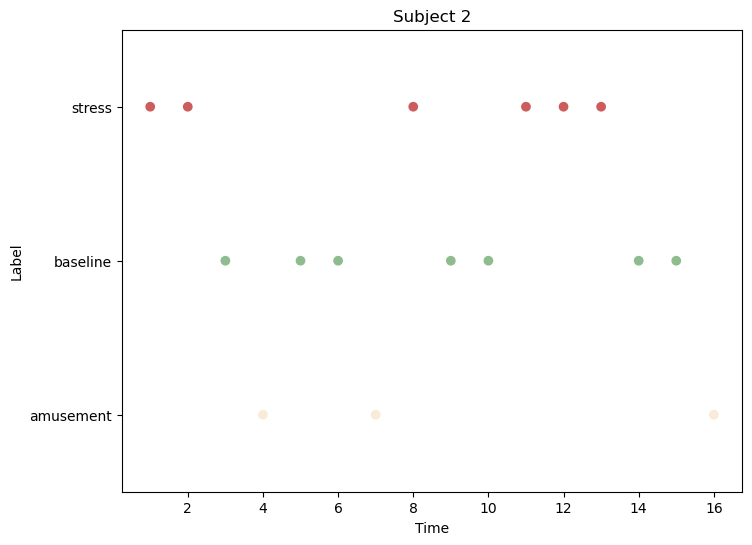

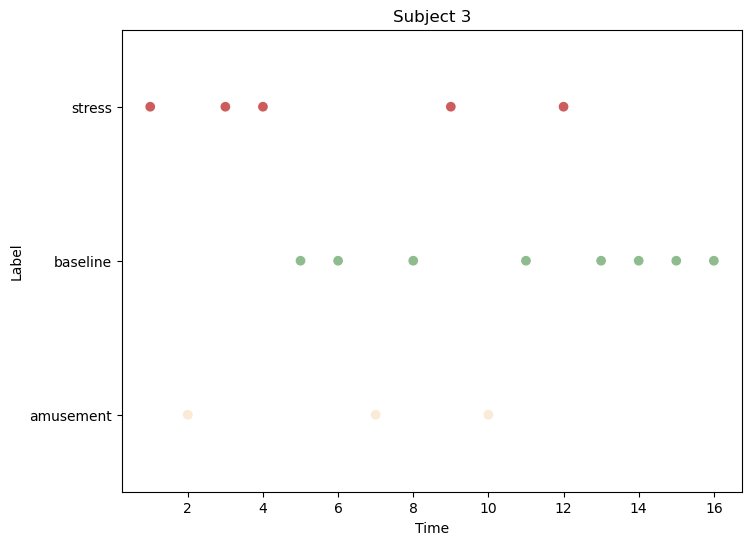

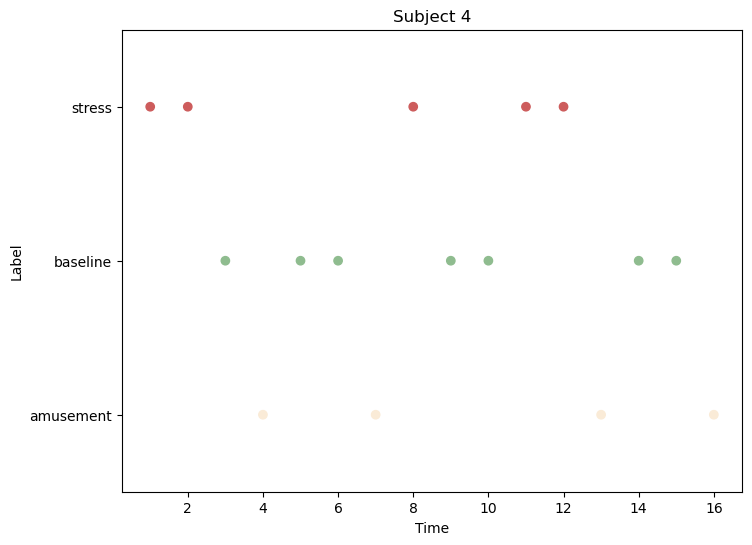

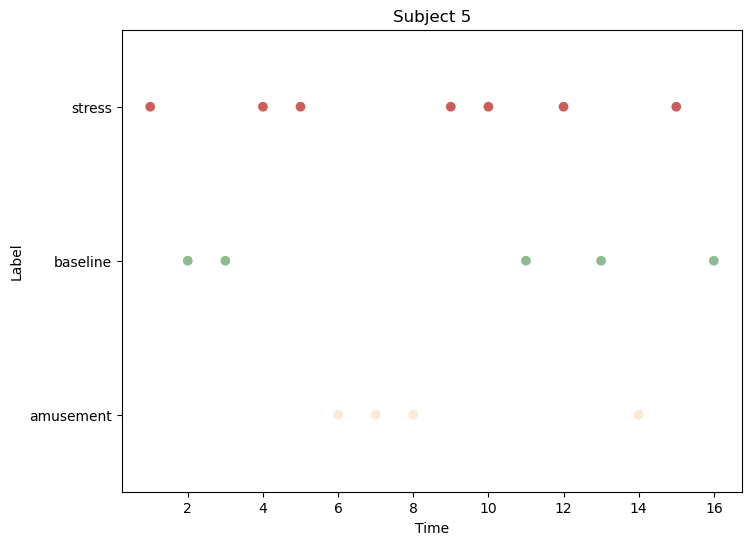

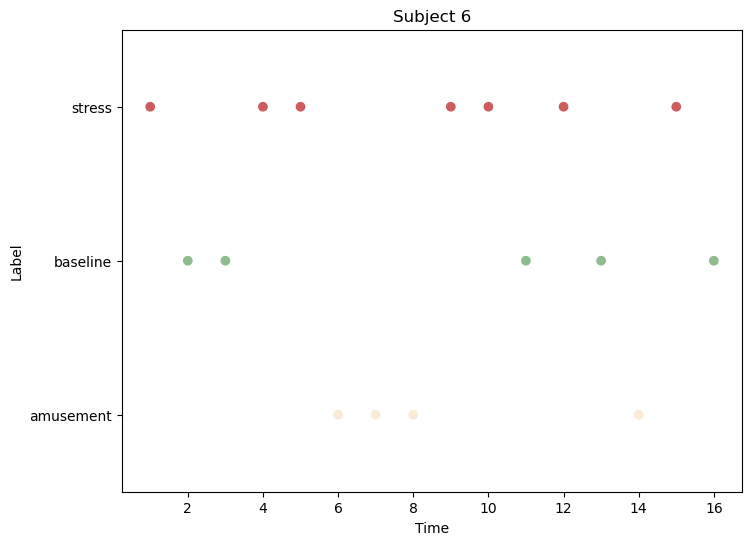

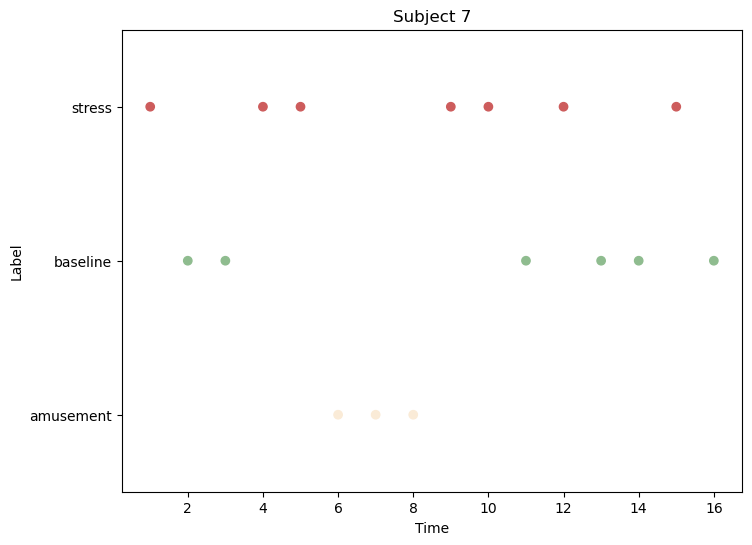

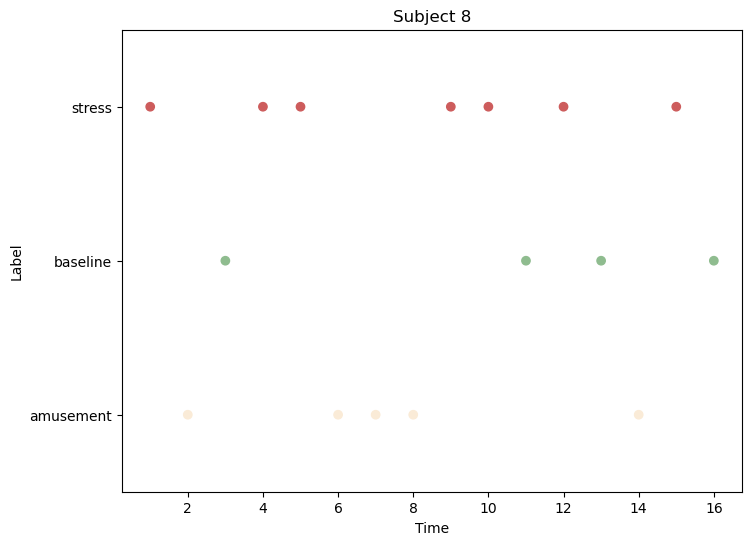

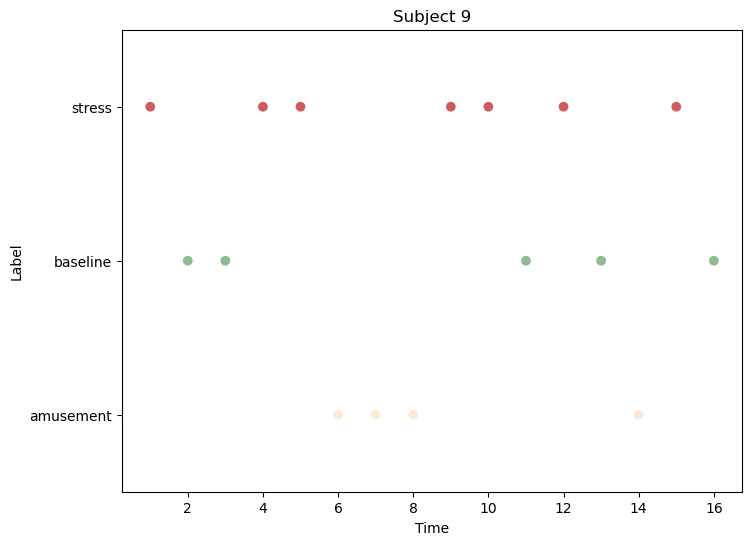

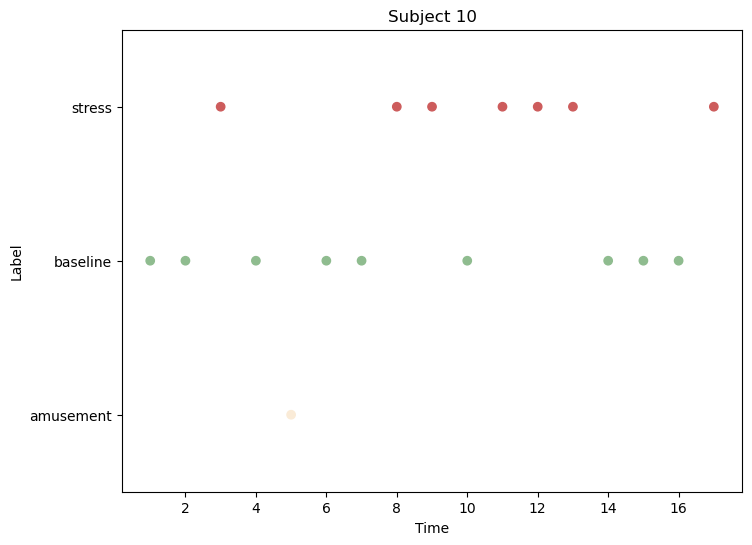

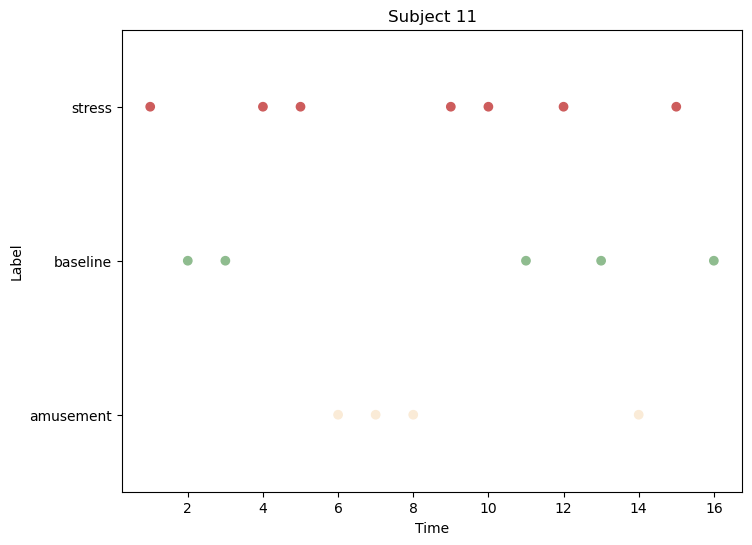

In [111]:
import matplotlib.pyplot as plt
label_mapping = {
    0: ('amusement', (250/255, 235/255, 215/255)),
    1: ('baseline', (143/255, 188/255, 143/255)),
    2: ('stress', (205/255, 92/255, 92/255))
}

# plot
for subject, labels in pred_dt.items():
    label_text = [label_mapping[label][0] for label in labels]
    label_colors = [label_mapping[label][1] for label in labels]
    plt.figure(figsize=(8, 6))
    plt.scatter(range(1, len(labels)+1), labels, c=label_colors)
    plt.title(f'Subject {subject}')
    plt.xlabel('Time')
    plt.ylabel('Label')
    plt.yticks([0, 1, 2], [label_mapping[i][0] for i in range(3)])
    plt.ylim(-0.5, 2.5)
    plt.savefig(f'S{subject}_plot_DT.png')  # Save as PNG format
    plt.show()

## Random Forest

Accuracy: 0.967741935483871
Accuracy: 1.0
Accuracy: 0.967741935483871
Accuracy: 1.0
Accuracy: 1.0
Accuracy: 1.0
Accuracy: 1.0
Accuracy: 1.0
Accuracy: 1.0
Accuracy: 1.0


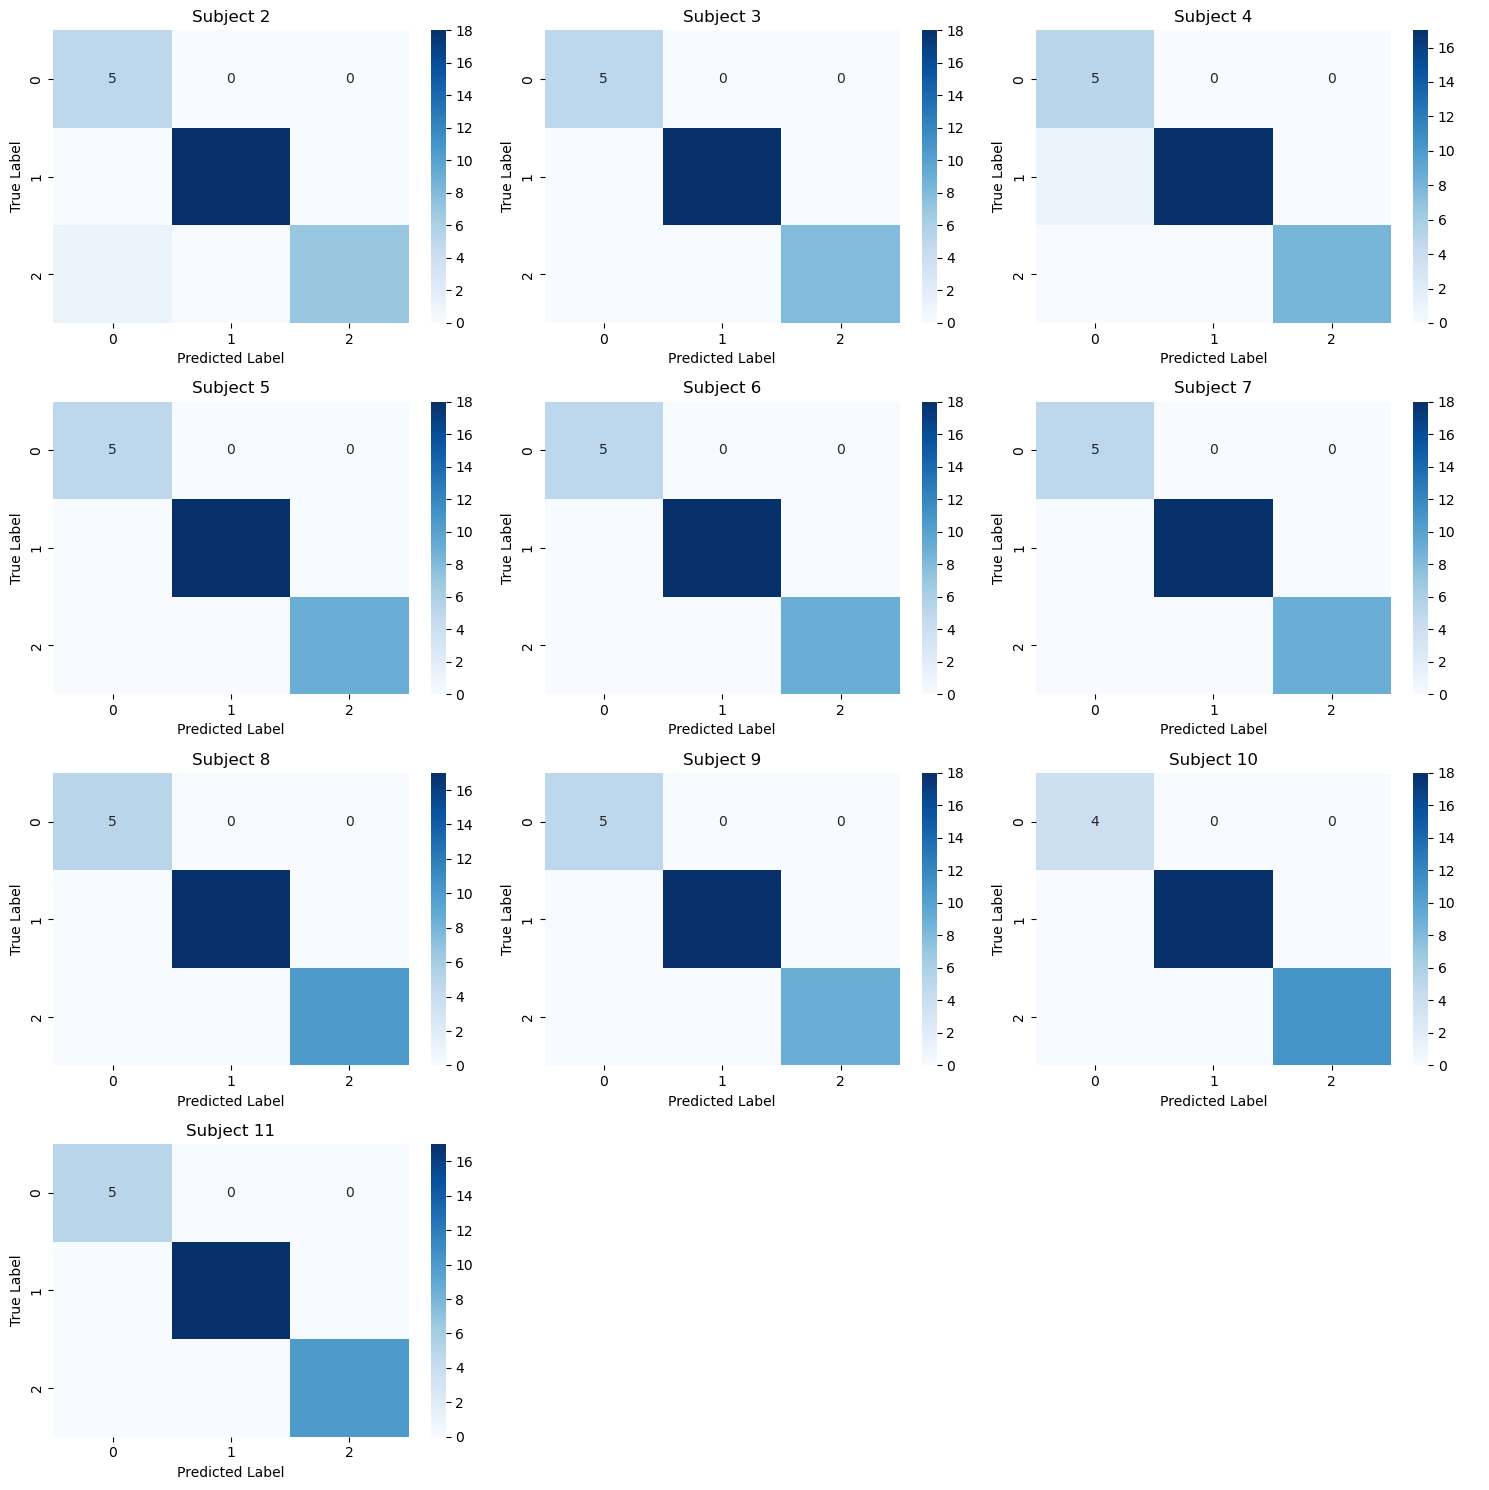

In [108]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.model_selection import train_test_split

# Load data
data = df[feats]

# Define the size of the grid based on the number of subjects
grid_size = (4, 3)
fig, axes = plt.subplots(nrows=grid_size[0], ncols=grid_size[1], figsize=(15, 15))  # Adjust for the best fit on your screen

subject_ids = np.unique(data['subject'])
predicted_labels_RF = {}

for i, subject_id in enumerate(subject_ids):
    ax = axes[i // grid_size[1], i % grid_size[1]]  # Calculate subplot index
    
    # Filter data for the current subject
    subject_data = data[data['subject'] == subject_id]
    
    # Split features and labels
    X = subject_data.drop(['label', 'subject'], axis=1)
    y = subject_data['label']
    
    # Split data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)
    
    # Initialize the Random Forest classifier
    clf = RandomForestClassifier(n_estimators=100, random_state=42)
    
    # Train the classifier
    clf.fit(X_train, y_train)
    
    # Make predictions on the test set
    y_pred = clf.predict(X_test)
    predicted_labels_RF[subject_id] = y_pred
    
    # Model Accuracy, how often is the classifier correct?
    print("Accuracy:", accuracy_score(y_test, y_pred))
    
    # Compute the confusion matrix
    conf_mat = confusion_matrix(y_test, y_pred)
    
    # Plot the confusion matrix as a heatmap
    sns.heatmap(conf_mat, annot=True, fmt='d', ax=ax, cmap='Blues')
    ax.set_title(f'Subject {subject_id}')
    ax.set_ylabel('True Label')
    ax.set_xlabel('Predicted Label')

# Hide any unused subplots
for i in range(len(subject_ids), grid_size[0] * grid_size[1]):
    axes[i // grid_size[1], i % grid_size[1]].axis('off')

plt.tight_layout()
plt.show()


Plot the prediction results

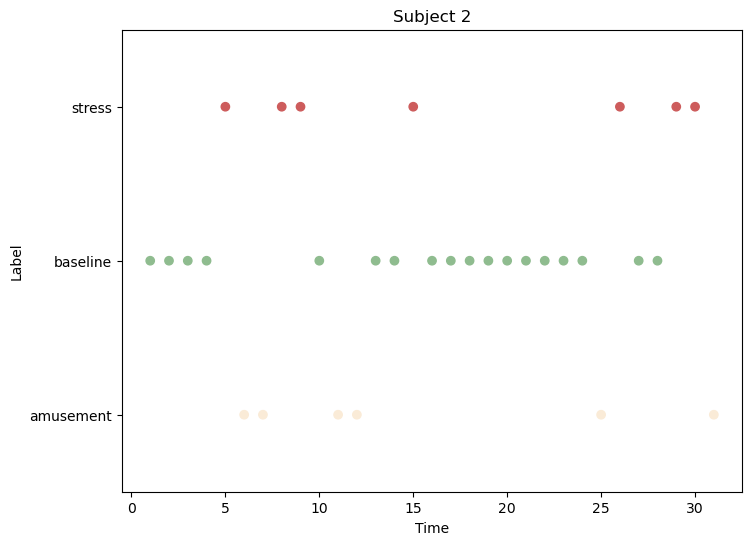

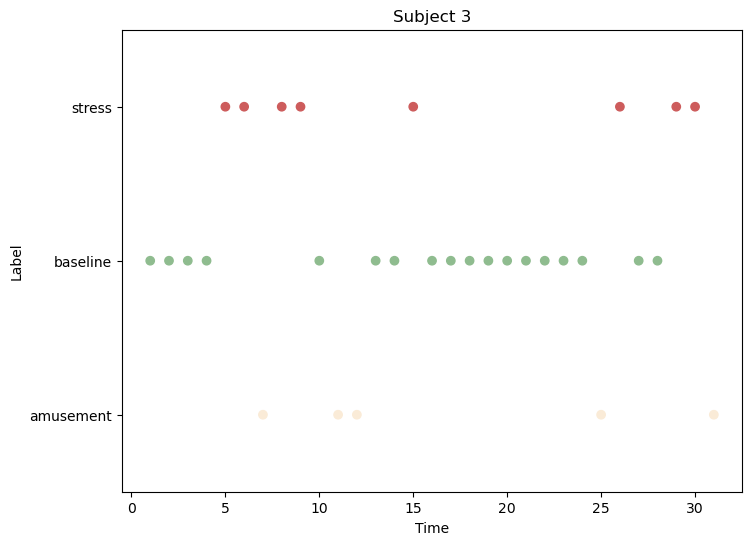

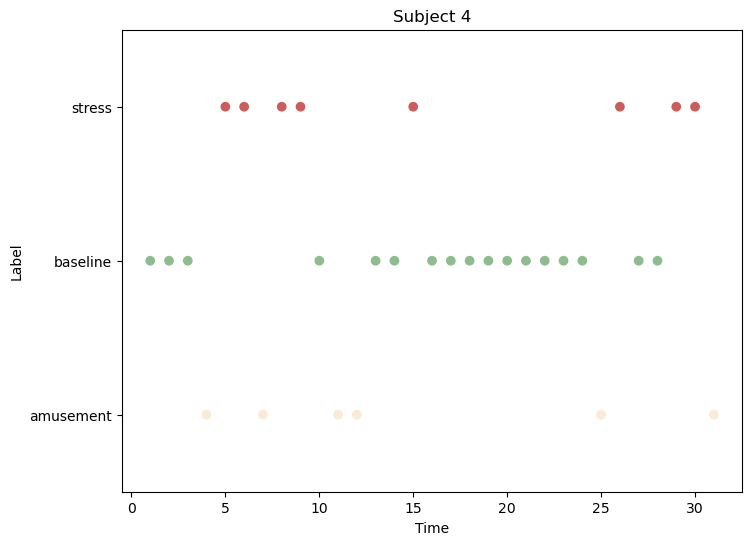

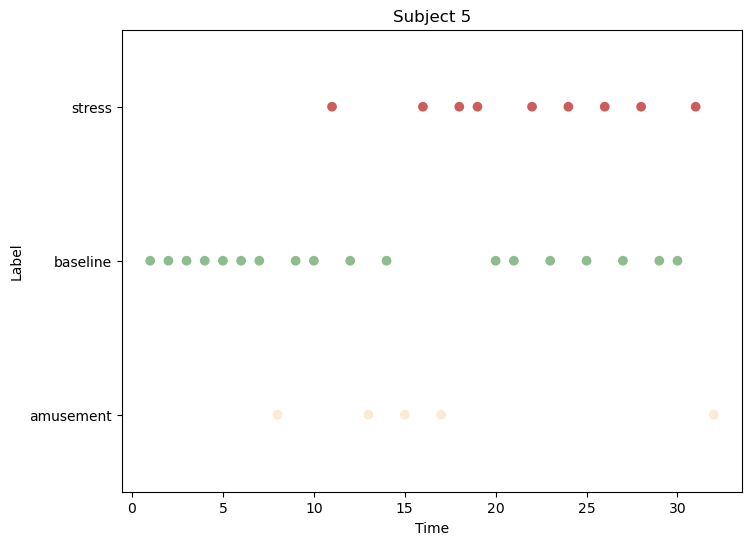

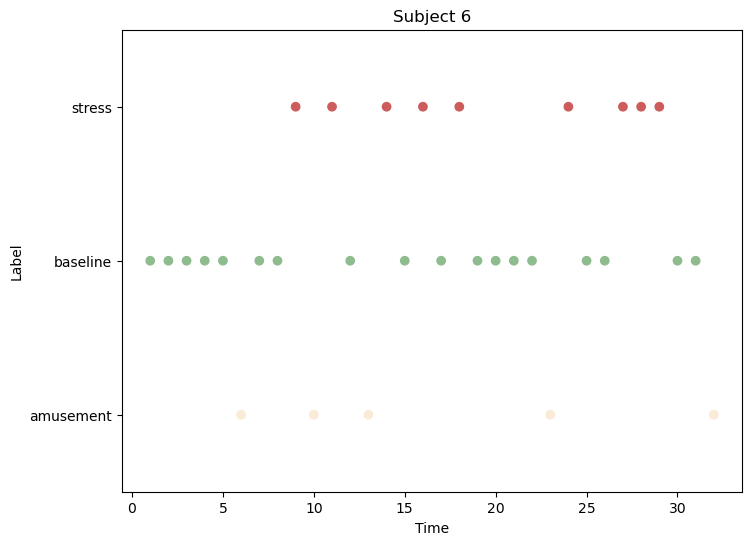

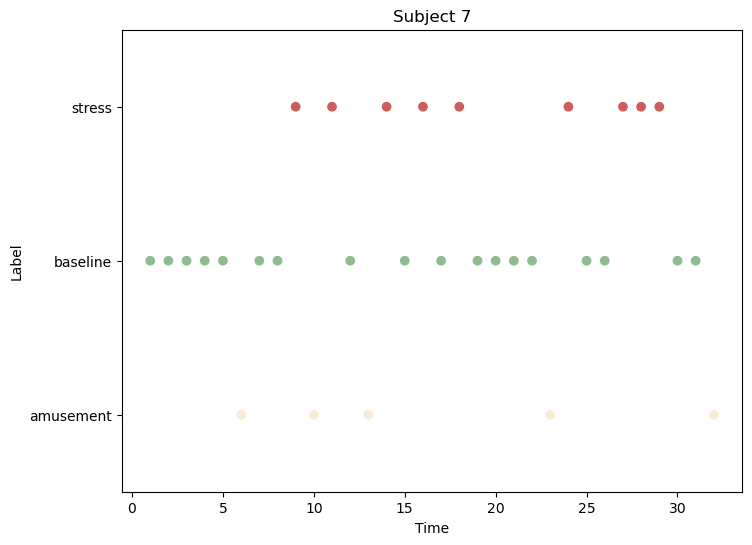

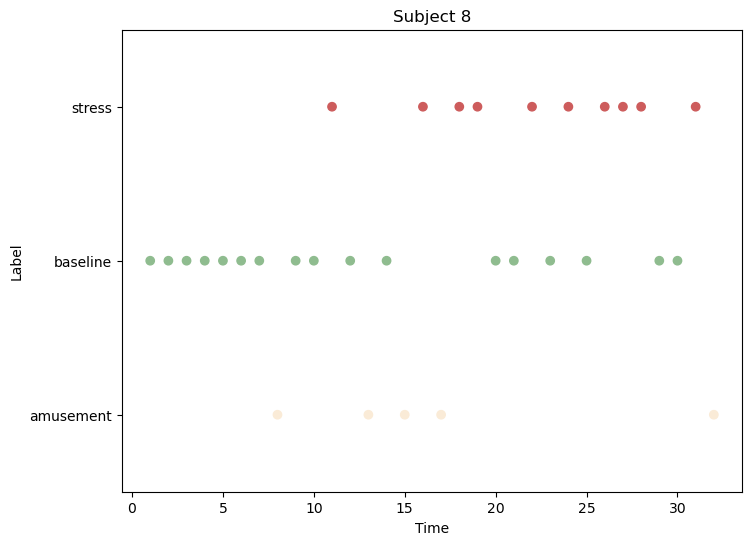

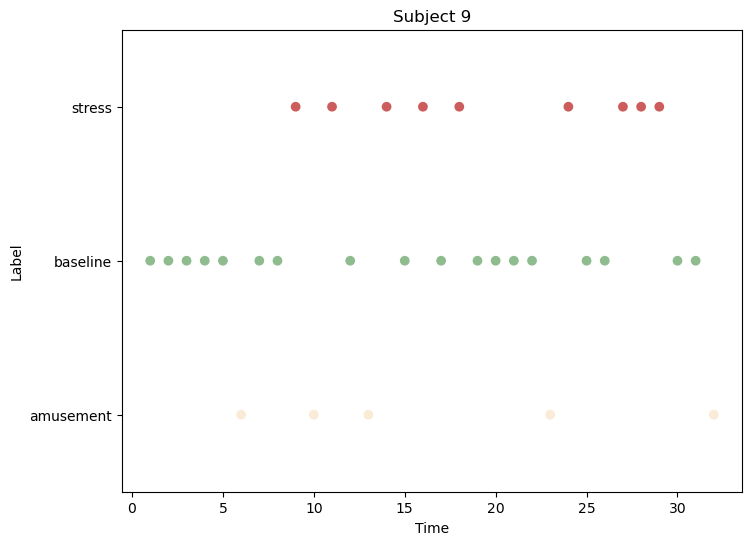

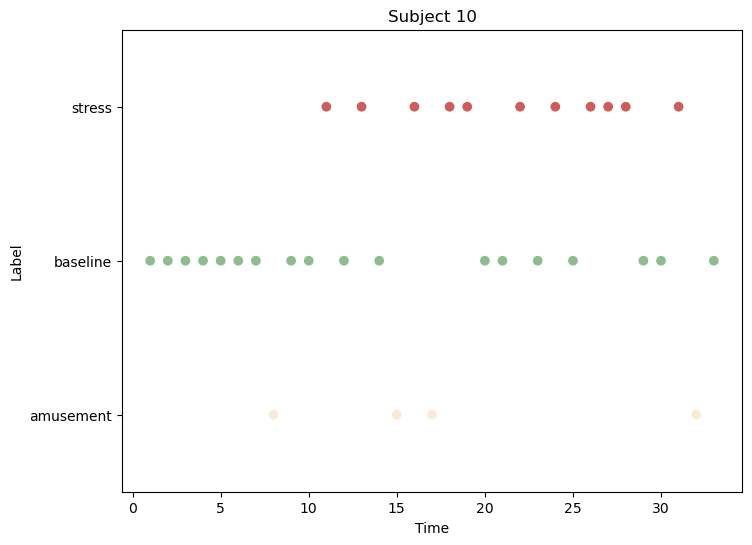

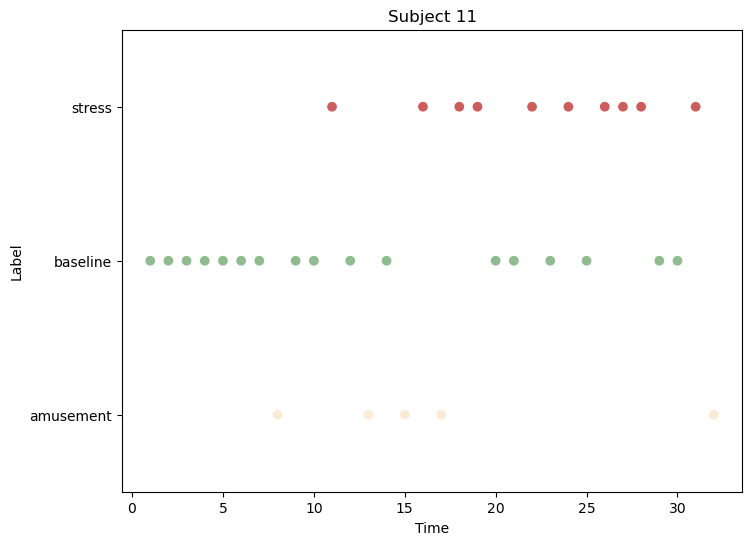

In [113]:
import matplotlib.pyplot as plt
label_mapping = {
    0: ('amusement', (250/255, 235/255, 215/255)),
    1: ('baseline', (143/255, 188/255, 143/255)),
    2: ('stress', (205/255, 92/255, 92/255))
}

for subject, labels in predicted_labels_RF.items():
    label_text = [label_mapping[label][0] for label in labels]
    label_colors = [label_mapping[label][1] for label in labels]
    plt.figure(figsize=(8, 6))
    plt.scatter(range(1, len(labels)+1), labels, c=label_colors)
    plt.title(f'Subject {subject}')
    plt.xlabel('Time')
    plt.ylabel('Label')
    plt.yticks([0, 1, 2], [label_mapping[i][0] for i in range(3)])
    plt.ylim(-0.5, 2.5)
    plt.savefig(f'S{subject}_plot_RF.png')  # Save as PNG format
    plt.show()

## AdaBoost

In [114]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import pandas as pd

df2 = df[feats]
subject_ids = df2['subject'].unique()

# Initialize a dictionary to store accuracies for each subject
subject_accuracies = {}
predicted_labels_AB = {}

# Iterate over each subject ID
for subject_id in subject_ids:
    # Filter data for the current subject ID
    subject_data = df2[df2['subject'] == subject_id]
    
    # Split the data into features (X) and labels (y)
    X = subject_data.drop(['subject', 'label'], axis=1)
    y = subject_data['label']
    
    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Create an AdaBoost classifier
    adaboost_clf = AdaBoostClassifier(n_estimators=500, random_state=42)
    
    # Train the classifier
    adaboost_clf.fit(X_train, y_train)
    
    # Make predictions on the test set
    y_pred = adaboost_clf.predict(X_test)
    predicted_labels_AB[subject_id] = y_pred
    
    # Evaluate the model's accuracy
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Subject {subject_id} - Accuracy: {accuracy}")
    

Subject 2 - Accuracy: 0.9375
Subject 3 - Accuracy: 0.875
Subject 4 - Accuracy: 1.0
Subject 5 - Accuracy: 1.0
Subject 6 - Accuracy: 0.9375
Subject 7 - Accuracy: 0.875
Subject 8 - Accuracy: 1.0
Subject 9 - Accuracy: 1.0
Subject 10 - Accuracy: 1.0
Subject 11 - Accuracy: 1.0


Plot the prediction results

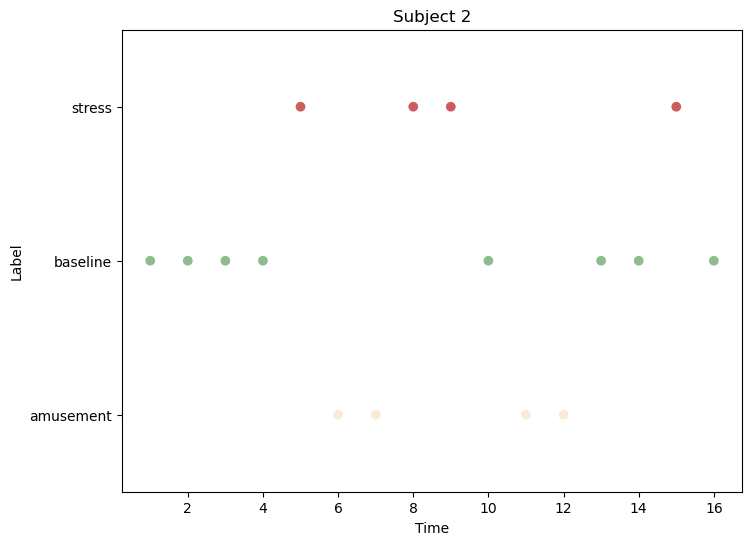

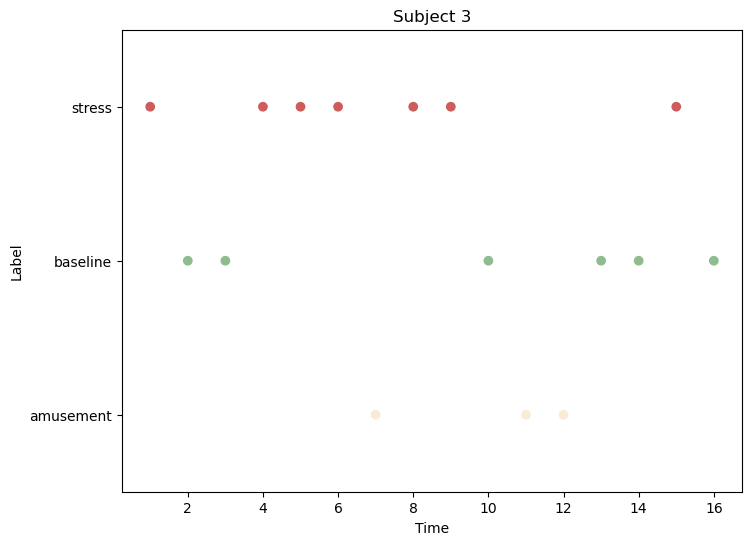

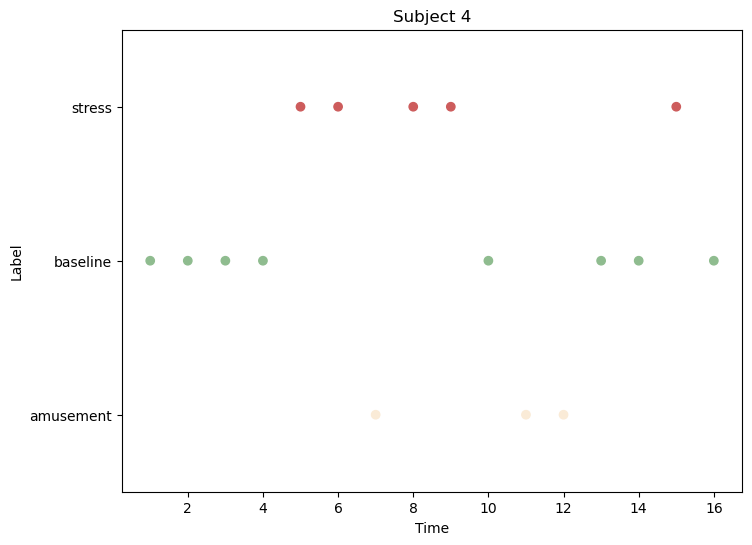

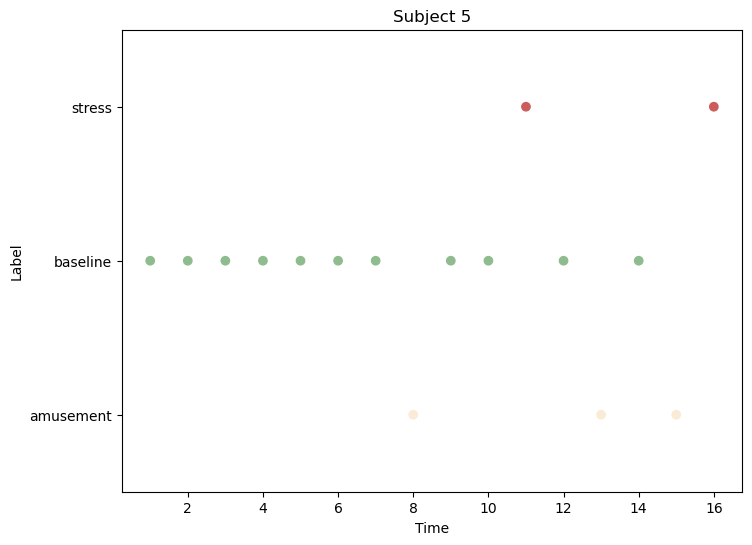

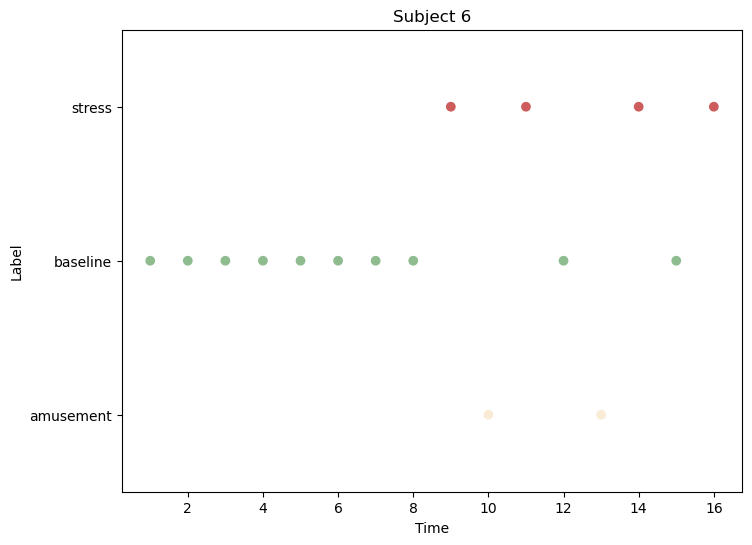

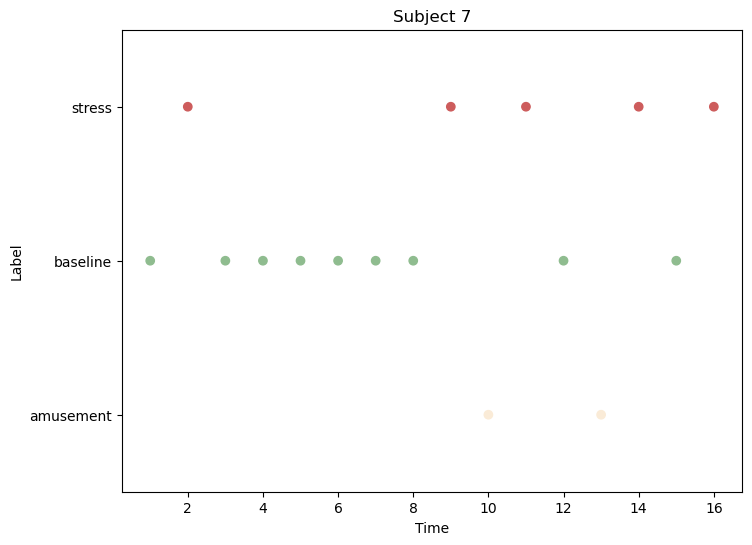

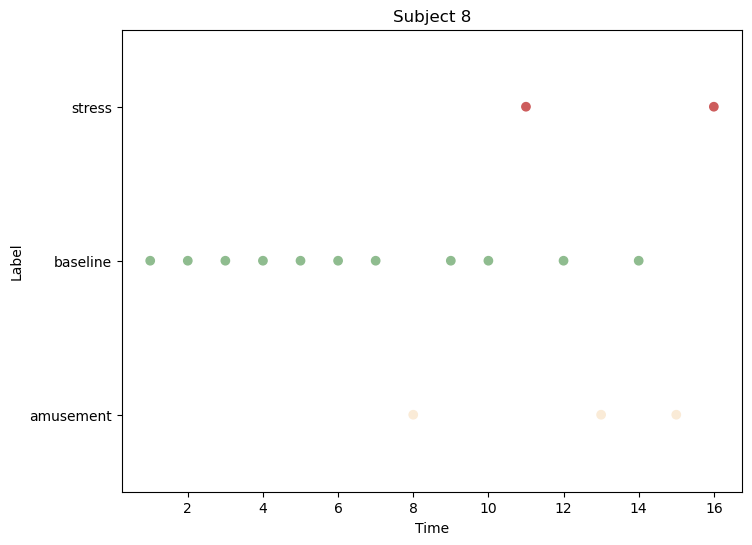

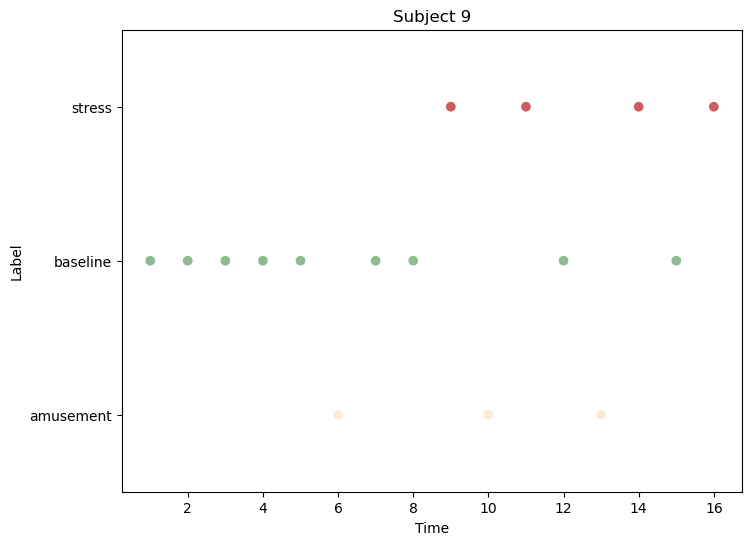

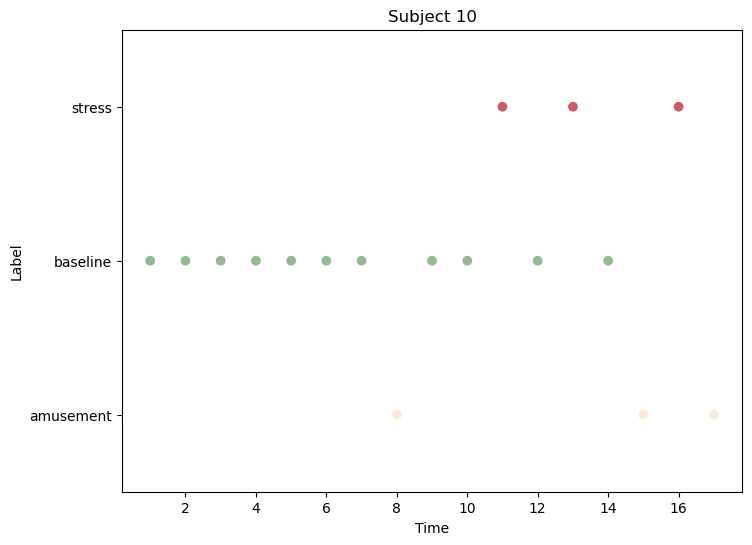

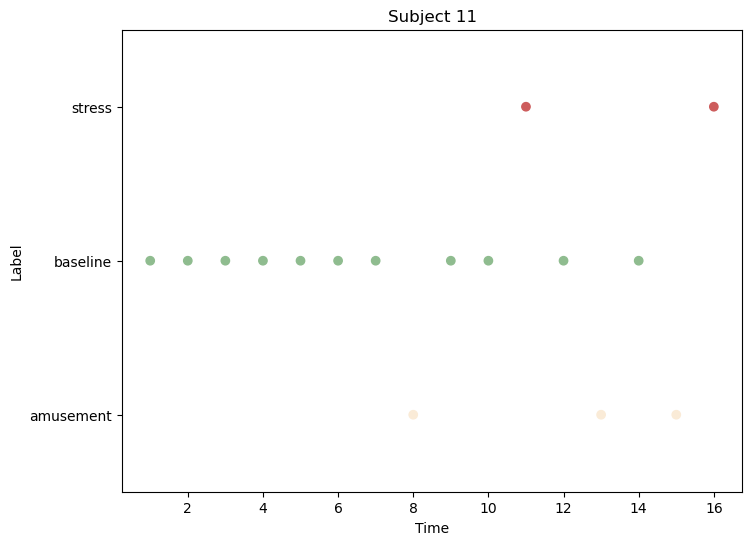

In [115]:
import matplotlib.pyplot as plt
label_mapping = {
    0: ('amusement', (250/255, 235/255, 215/255)),
    1: ('baseline', (143/255, 188/255, 143/255)),
    2: ('stress', (205/255, 92/255, 92/255))
}

for subject, labels in predicted_labels_AB.items():
    label_text = [label_mapping[label][0] for label in labels]
    label_colors = [label_mapping[label][1] for label in labels]
    plt.figure(figsize=(8, 6))
    plt.scatter(range(1, len(labels)+1), labels, c=label_colors)
    plt.title(f'Subject {subject}')
    plt.xlabel('Time')
    plt.ylabel('Label')
    plt.yticks([0, 1, 2], [label_mapping[i][0] for i in range(3)])
    plt.ylim(-0.5, 2.5)
    plt.savefig(f'S{subject}_plot_AB.png')  # Save as PNG format
    plt.show()

## LDA

In [116]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import StandardScaler
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df2 = df[feats]

# One-hot encode the labels
df2 = pd.concat([df2.drop('label', axis=1), pd.get_dummies(df2['label'])], axis=1)

# Get unique subject IDs
subject_ids = df2['subject'].unique()

# Create an empty list to store confusion matrices for each subject
confusion_matrices = []

predicted_labels_LDA = {}

# Iterate over each subject
for subject_id in subject_ids:
    # Filter data for the current subject
    subject_data = df[df['subject'] == subject_id]

    # Split data into features and target
    X = subject_data.drop(['subject', 'label'], axis=1).values
    y = subject_data['label'].values

    # Split data into train and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

    # Standardize features
    sc = StandardScaler()
    X_train = sc.fit_transform(X_train)
    X_test = sc.transform(X_test)

    # Apply LDA
    lda = LDA()
    X_train_lda = lda.fit_transform(X_train, y_train)
    X_test_lda = lda.transform(X_test)

    # Make predictions
    y_pred = lda.predict(X_test)
    predicted_labels_LDA[subject_id] = y_pred

    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Subject {subject_id} - Accuracy: {accuracy}")

    # Confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    confusion_matrices.append(cm)



Subject 2 - Accuracy: 0.875
Subject 3 - Accuracy: 0.9375
Subject 4 - Accuracy: 0.875
Subject 5 - Accuracy: 0.75
Subject 6 - Accuracy: 1.0
Subject 7 - Accuracy: 0.875
Subject 8 - Accuracy: 0.75
Subject 9 - Accuracy: 1.0
Subject 10 - Accuracy: 0.9411764705882353
Subject 11 - Accuracy: 1.0


Plot the prediction results

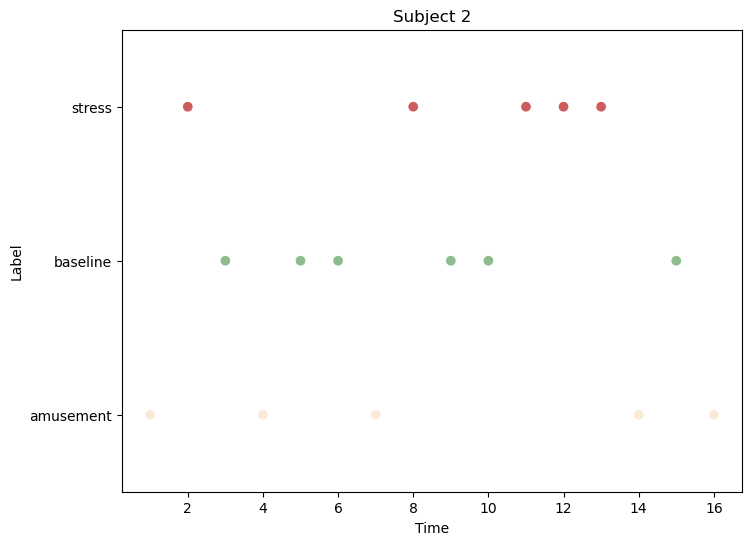

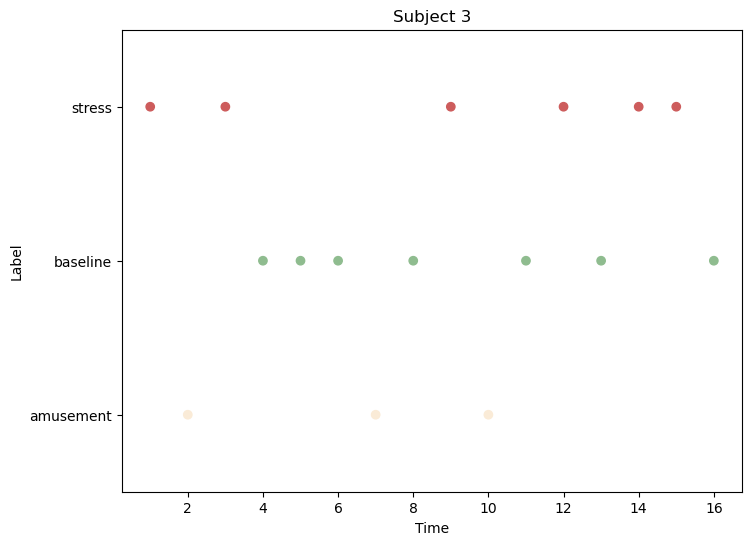

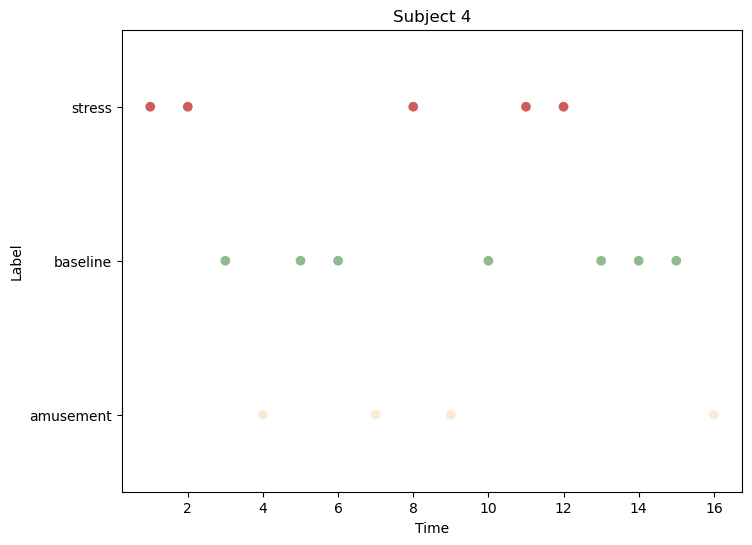

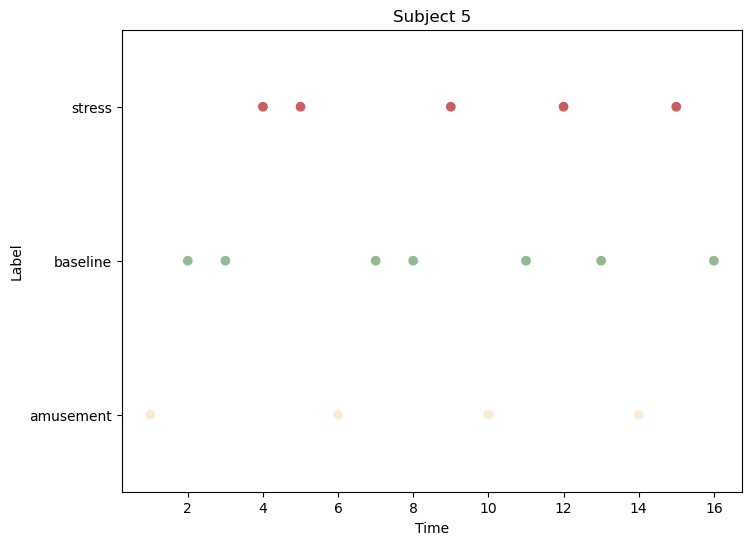

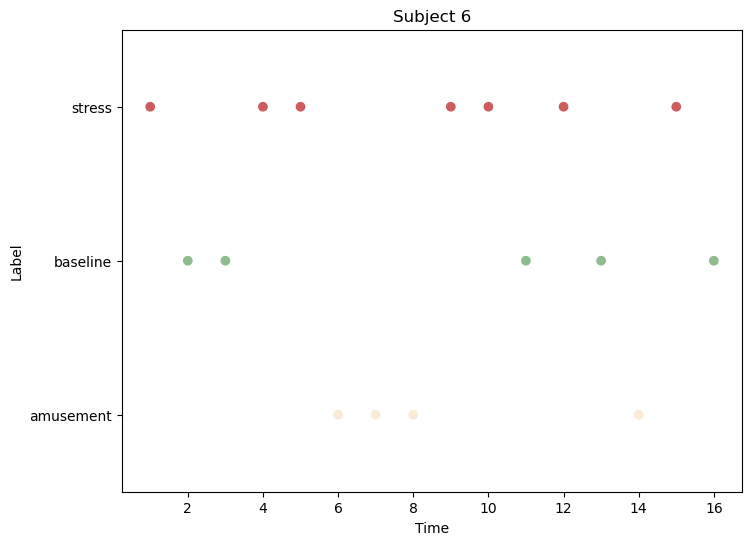

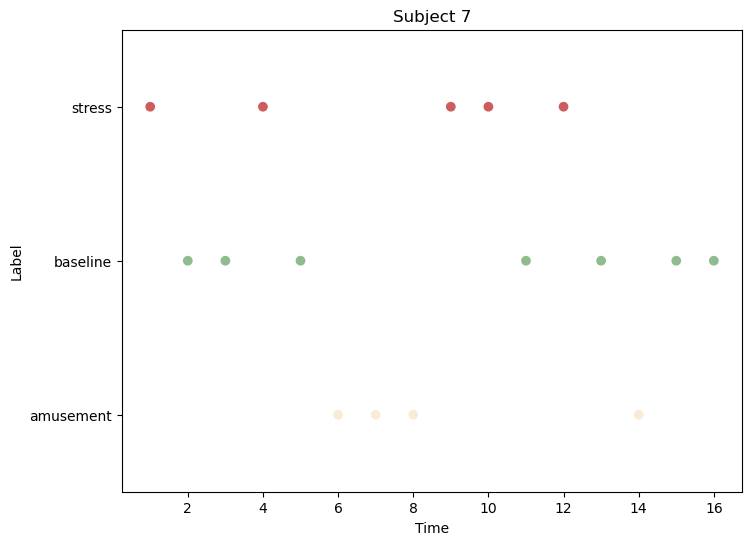

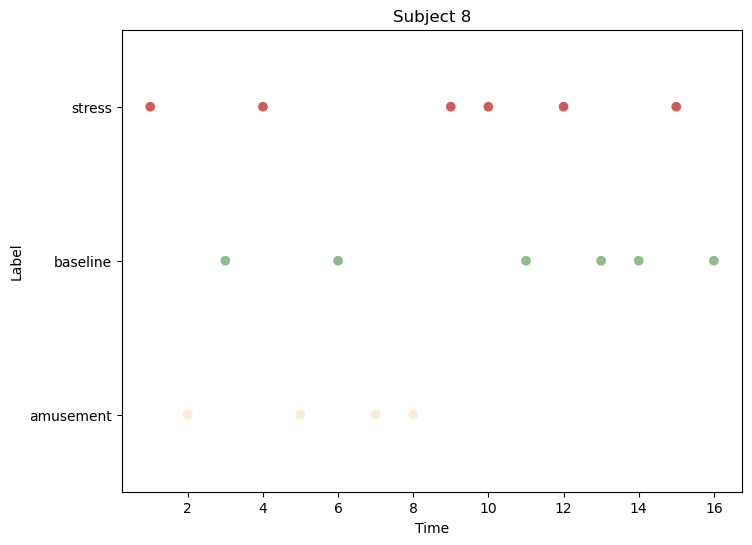

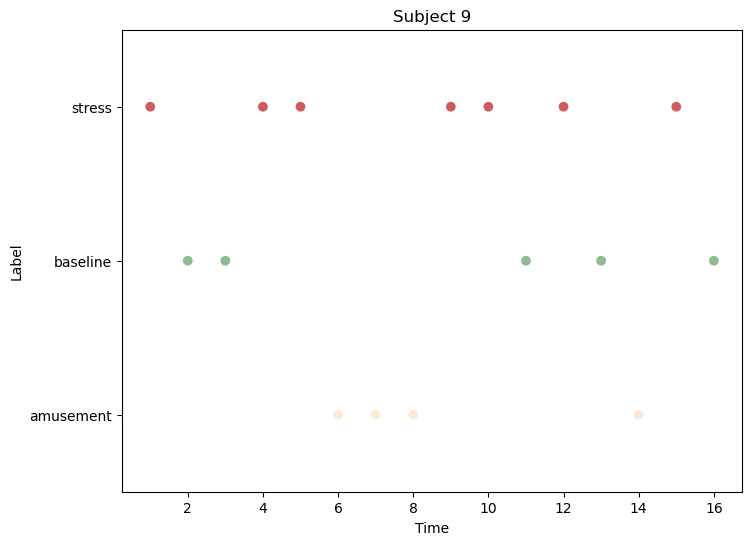

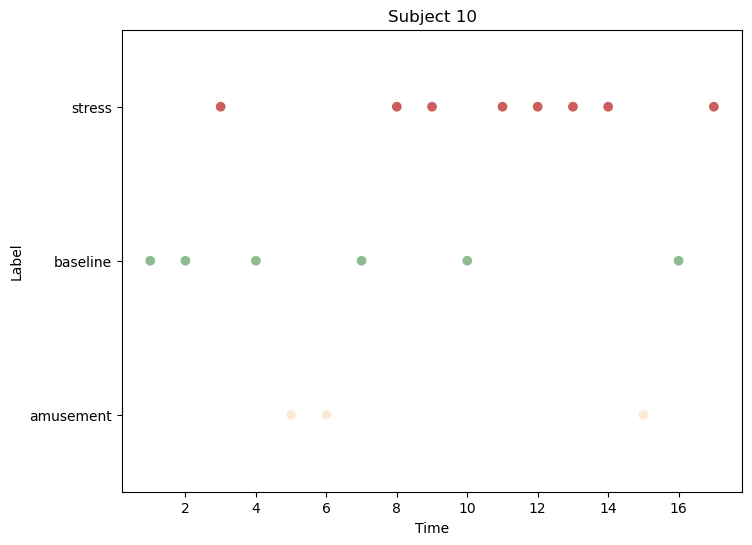

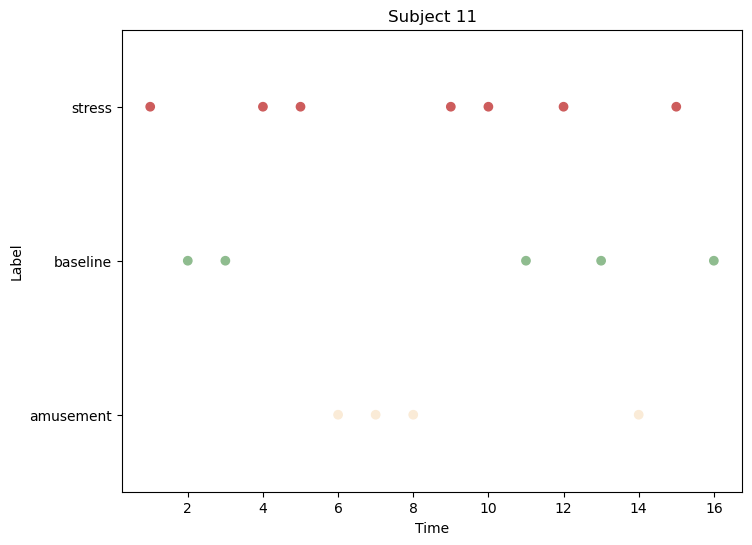

In [117]:
import matplotlib.pyplot as plt
label_mapping = {
    0: ('amusement', (250/255, 235/255, 215/255)),
    1: ('baseline', (143/255, 188/255, 143/255)),
    2: ('stress', (205/255, 92/255, 92/255))
}

for subject, labels in predicted_labels_LDA.items():
    label_text = [label_mapping[label][0] for label in labels]
    label_colors = [label_mapping[label][1] for label in labels]
    plt.figure(figsize=(8, 6))
    plt.scatter(range(1, len(labels)+1), labels, c=label_colors)
    plt.title(f'Subject {subject}')
    plt.xlabel('Time')
    plt.ylabel('Label')
    plt.yticks([0, 1, 2], [label_mapping[i][0] for i in range(3)])
    plt.ylim(-0.5, 2.5)
    plt.savefig(f'S{subject}_plot_LDA.png')  # Save as PNG format
    plt.show()